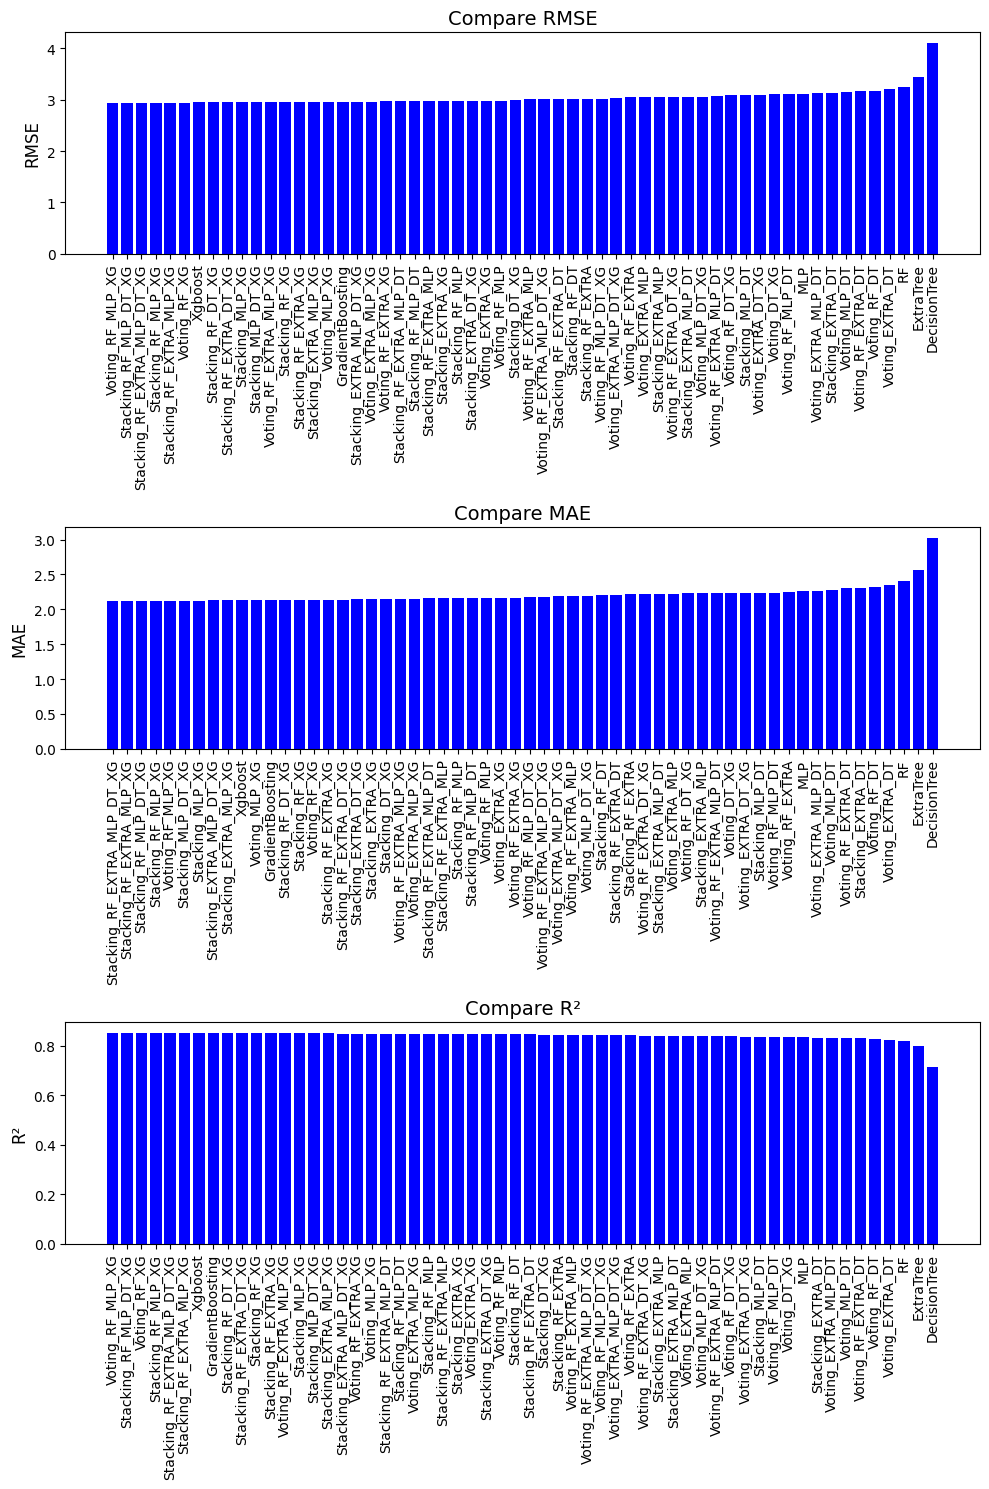

In [1]:
import os
import pickle
import math
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

from utils.get_models_from_result import load_rmse_from_pkl, plot_rmse
from enums.enums import Rmse, Data

remse_datss = {}
mae_datss = {}
r2_datss = {}
ex_datss = {}

# 폴더 내 모든 파일을 순회
for filename in os.listdir('result_model_fold/Swanton_OH'):
    if filename.endswith(".pkl"):
        file_path = os.path.join('result_model_fold/Swanton_OH', filename)

        # pkl 파일 불러오기
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            remse_datss[filename.replace('_model_with_Swanton_OH.pkl','')] = math.sqrt(mean_squared_error(data[Data.TEST_OUTPUT_DATA], data[Data.PREDICTED_OUTPUT_DATA]))
            mae_datss[filename.replace('_model_with_Swanton_OH.pkl','')] = mean_absolute_error(data[Data.TEST_OUTPUT_DATA], data[Data.PREDICTED_OUTPUT_DATA])
            r2_datss[filename.replace('_model_with_Swanton_OH.pkl','')] = r2_score(data[Data.TEST_OUTPUT_DATA], data[Data.PREDICTED_OUTPUT_DATA])

sorted_remse_datss = sorted(remse_datss.items(), key=lambda item: item[1])
sorted_mae_datss = sorted(mae_datss.items(), key=lambda item: item[1])
sorted_r2_datss = sorted(r2_datss.items(), key=lambda item: item[1], reverse=True)

# 파일 이름과 RMSE 값 분리
rmse_files = [item[0] for item in sorted_remse_datss]
rmse_values = [item[1] for item in sorted_remse_datss]
mae_files = [item[0] for item in sorted_mae_datss]
mae_values = [item[1] for item in sorted_mae_datss]
r2_files = [item[0] for item in sorted_r2_datss]
r2_values = [item[1] for item in sorted_r2_datss]

# 그래프 그리기
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# RMSE 그래프
axes[0].bar(rmse_files, rmse_values, color='blue')
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_title('Compare RMSE', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

# MAE 그래프
axes[1].bar(mae_files, mae_values, color='blue')
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('Compare MAE', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# R² 그래프
axes[2].bar(r2_files, r2_values, color='blue')
axes[2].set_ylabel('R²', fontsize=12)
axes[2].set_title('Compare R²', fontsize=14)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()